## Workflow Example

Below is a simple workflow that applies all the basic principles needed to create a neural network that makes use of forward and backward propagation.

In [25]:
import torch
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'1.12.1+cu116'

### Preprocessing: Create and Load Data

In [18]:
# our linear regression formula with some known parameters
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

### Preprocessing: Partition Data with a Train-Test Split

In [19]:
# create a training-testing split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize Train-Test Split

In [20]:
def plotPredictions(train_data=X_train, 
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    """Plot our training data, test data and compare predictions"""
    plt.figure(figsize=(10,7))
    
    plt.scatter(train_data,train_labels, c="b", s=4, label="Training Data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
        
    plt.legend(prop={"size": 14})

In [ ]:
plotPredictions()

### Build Model

* `torch.nn`
* `torch.nn.Parameter` - parameters our model should learn
* `torch.nn.Module` - base class for all neural network modules
* `torch.optim` - where all the parameter optimizer algorithms are located

It's worth remembering that all nn.Module sub-classes require us to overwrite the forward() method in order to dicate what will happen during the forward computation in our model.

In [37]:
# A basic linear regression model in pytorch
class BasicLinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # initialize model parameters
        self.weights = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = torch.nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    # defines the forward computation needed to be done
    # linear regression in this case
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### Train Model

In [68]:
# A random seed
torch.manual_seed("848")

# Create an instance of our model
model_0 = BasicLinearRegressionModel()

# Take a look at the model's parameters
list(model_0.state_dict())
list(model_0.parameters())

[Parameter containing:
 tensor([0.1262], requires_grad=True),
 Parameter containing:
 tensor([0.6109], requires_grad=True)]

### Model Predictions

If we try to make some preliminary predictions, we'll see that the model does poorly, this is the case because it has been freshly instantiated with random values, and hasn't undergone any training.

* `torch.inference_mode()`

Note: disables gradient tracking so we can make a prediction, newer version of `torch.no_grad`.

In [69]:
with torch.inference_mode():
    y_predictions = model_0(X_test)

y_predictions

tensor([[0.7119],
        [0.7144],
        [0.7169],
        [0.7194],
        [0.7220],
        [0.7245],
        [0.7270],
        [0.7295],
        [0.7321],
        [0.7346]])

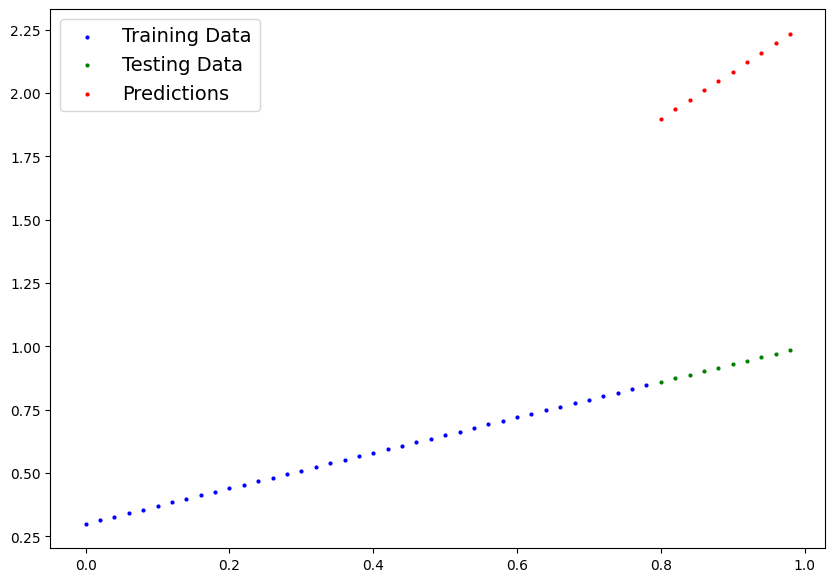

In [101]:
plotPredictions(predictions=y_predicates)

### Loss Functions and Optimizer

In [106]:
# Create Mean Absolute Error Loss Function
MAE_loss = torch.nn.L1Loss()

# Create Optimizer (Stochastic Gradient Descent), Learning Rate Hyperparameter
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)

### Training Loop

    a. forward propagation
    b. calculate loss (forward prop. vs ground truth)
    c. optimizer (set gradients to zero for every mini-batch)
    d. backpropagation (new parameter gradient based on loss)
    e. optimizer (gradient descent)

In [111]:
# Build a training loop

EPOCHS = 2500

# a. loop through data
for epoch in range(EPOCHS):
    # enable training mode and track gradients on valid parameters
    model_0.train()  
    
    # a. forward propagation (our "forward()" method)
    y_predictions = model_0(X_train)
    
    # b. calculate loss
    loss = MAE_loss(y_predictions, y_train)
    
    # c. zero_grad optimizer (zero out the optimizer gradients)
    optimizer.zero_grad()
    
    # d. back propagation on loss function (compute gradient for every parameter)
    loss.backward()
    
    # e. gradient descent optimizer (update parameters with new gradients)
    optimizer.step()
    
    # Testing
    # turn off gradient tracking
    model_0.eval()
    
    with torch.inference_mode():
        
    

In [112]:
print(f"Loss:{loss}")

Loss:0.0004486747202463448


In [113]:
print(model_0.state_dict())

OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.2996]))])


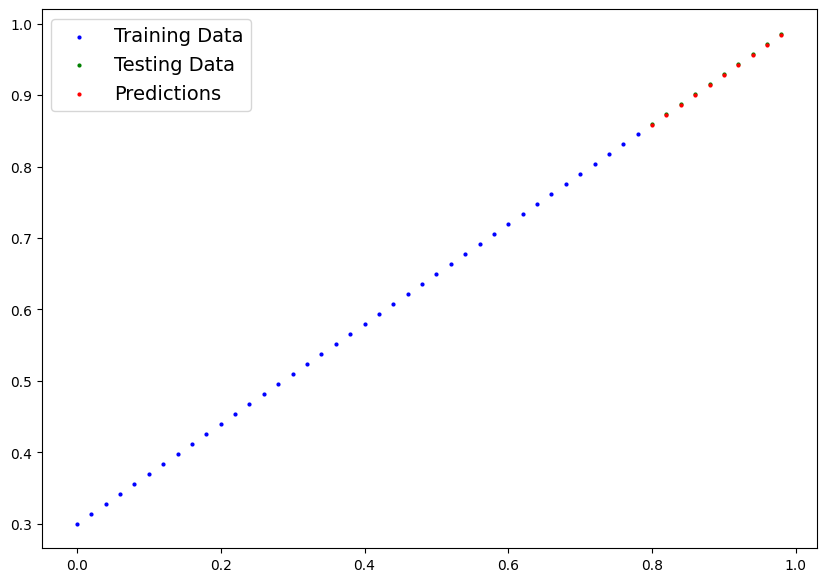

In [114]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)
    
plotPredictions(predictions=y_pred_new)

### Testing Loop